In [1]:
import pandas as pd
import numpy as np
from ultralytics import YOLO
import torch

import shutil
import os

import random

from PIL import Image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


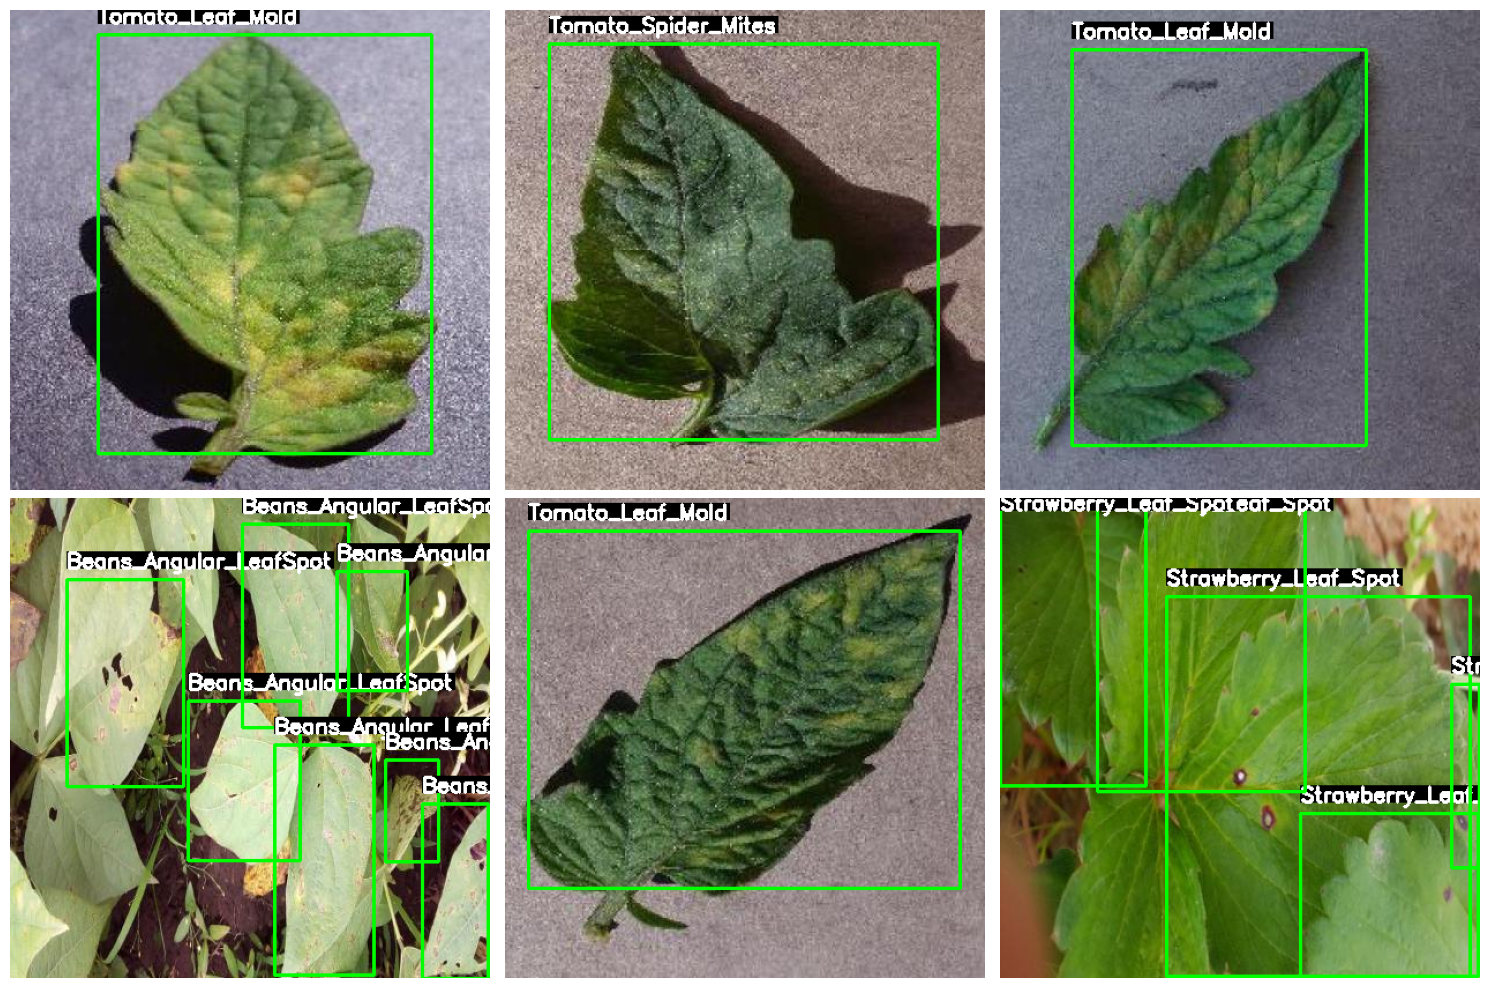

In [2]:
import yaml
random.seed(42)

# Папки с изображениями и метками
images_folder = "train/images"
labels_folder = "train/labels"

# Загрузка списка файлов изображений
image_files = os.listdir(images_folder)

# Выбор случайных изображений
random.shuffle(image_files)
random_image_files = image_files[:6]

# Отображение случайных изображений с метками
num_images = len(random_image_files)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()


with open("data.yaml", "r") as f:
    data = yaml.safe_load(f)
classes = data["names"]  # Список классов

for i in range(num_images):
    # Загрузка изображения
    image_file = os.path.join(images_folder, random_image_files[i])
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Загрузка меток из файла
    label_file = os.path.join(labels_folder, os.path.splitext(random_image_files[i])[0] + ".txt")
    if not os.path.exists(label_file):
        continue
    with open(label_file, "r") as file:
        labels = file.readlines()

    # Отображение изображения с метками
    h, w, _ = image.shape
    for label in labels:
        class_id, x_center, y_center, box_width, box_height = map(float, label.strip().split())

        # Перевод YOLO координат в координаты прямоугольника
        x1 = int((x_center - box_width / 2) * w)
        y1 = int((y_center - box_height / 2) * h)
        x2 = int((x_center + box_width / 2) * w)
        y2 = int((y_center + box_height / 2) * h)

        # Настройка уменьшенной толщины и текста
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Толщина = 1
        class_name = classes[int(class_id)] if int(class_id) < len(classes) else f"Class {int(class_id)}"

        font_scale = 0.6
        thickness = 2
        text_size = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]
        text_x = x1
        text_y = y1 - 10 if y1 - 10 > 10 else y1 + 10

        # Фон под текстом (для четкости)
        cv2.rectangle(image, (text_x, text_y - text_size[1]), (text_x + text_size[0], text_y), (0, 0, 0), -1)
        cv2.putText(image, class_name, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), thickness)

    # Отображение изображения
    axes[i].imshow(image)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [3]:
model = YOLO("yolo11l.pt")

100%|██████████| 49.0M/49.0M [00:00<00:00, 61.5MB/s]


In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [5]:
model.train(data='data.yaml ', epochs=50, imgsz=416,
            optimizer = 'AdamW', lr0 = 1e-3, 
            project = 'YOLO11l', name='Large_try',
            batch=32, device=device, seed=69)

Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=data.yaml , epochs=50, time=None, patience=100, batch=32, imgsz=416, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=YOLO11l, name=Large_try, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=69, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

train: Scanning /home/user/Disease/train/labels.cache... 2904 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2904/2904 [00:00<?, ?it/s]
val: Scanning /home/user/Disease/valid/labels.cache... 1416 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1416/1416 [00:00<?, ?it/s]


Plotting labels to YOLO11l/Large_try/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to YOLO11l/Large_try
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       9.3G      1.175      2.123      1.472         89        416: 100%|██████████| 91/91 [00:26<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  2.92it/s]


                   all       1416       3193      0.448      0.229      0.227      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      9.45G      1.227       1.64      1.486         95        416: 100%|██████████| 91/91 [00:23<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.13it/s]


                   all       1416       3193      0.295        0.4      0.306      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.51G      1.184      1.488      1.456        108        416: 100%|██████████| 91/91 [00:22<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.09it/s]


                   all       1416       3193      0.423      0.395      0.291      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.44G      1.162      1.463       1.44        118        416: 100%|██████████| 91/91 [00:22<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.18it/s]


                   all       1416       3193       0.43      0.417      0.401      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.51G      1.136      1.346      1.423        123        416: 100%|██████████| 91/91 [00:22<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.27it/s]

                   all       1416       3193      0.547      0.519      0.532       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.45G      1.107      1.279      1.397         92        416: 100%|██████████| 91/91 [00:22<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.25it/s]


                   all       1416       3193      0.603      0.639      0.619      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.51G      1.047      1.161      1.364         88        416: 100%|██████████| 91/91 [00:22<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.25it/s]


                   all       1416       3193      0.661      0.658      0.659      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      9.46G      1.025       1.12      1.349         94        416: 100%|██████████| 91/91 [00:22<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.27it/s]

                   all       1416       3193       0.71      0.689      0.724      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       9.5G      1.002      1.089       1.34        120        416: 100%|██████████| 91/91 [00:22<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.29it/s]

                   all       1416       3193      0.712      0.693       0.74      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.45G     0.9732      1.056       1.32         82        416: 100%|██████████| 91/91 [00:22<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.27it/s]

                   all       1416       3193      0.758      0.742      0.772      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.49G     0.9553      1.014      1.305         84        416: 100%|██████████| 91/91 [00:22<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.27it/s]

                   all       1416       3193      0.756      0.713      0.769      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.45G     0.9464      0.965      1.293         95        416: 100%|██████████| 91/91 [00:22<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.28it/s]

                   all       1416       3193      0.775      0.773      0.807      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.51G      0.944     0.9637      1.293         81        416: 100%|██████████| 91/91 [00:22<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.29it/s]

                   all       1416       3193      0.767      0.755      0.784      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.44G     0.9207     0.9488      1.282         99        416: 100%|██████████| 91/91 [00:22<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.29it/s]

                   all       1416       3193      0.728      0.696      0.749      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       9.5G     0.9077     0.9059      1.276        100        416: 100%|██████████| 91/91 [00:22<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.30it/s]

                   all       1416       3193      0.801      0.774      0.815      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.44G     0.8939     0.8946      1.257         96        416: 100%|██████████| 91/91 [00:22<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.31it/s]

                   all       1416       3193      0.786      0.786      0.812      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       9.5G     0.9006     0.9004      1.258         79        416: 100%|██████████| 91/91 [00:22<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.30it/s]

                   all       1416       3193      0.779      0.774      0.808      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.44G     0.8627     0.8461      1.243        112        416: 100%|██████████| 91/91 [00:22<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.31it/s]

                   all       1416       3193      0.799      0.765      0.821      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.52G     0.8533     0.8561      1.236        131        416: 100%|██████████| 91/91 [00:22<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.31it/s]

                   all       1416       3193      0.795      0.758      0.815       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      9.45G     0.8699     0.8414      1.244        121        416: 100%|██████████| 91/91 [00:22<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.30it/s]

                   all       1416       3193      0.784       0.78      0.829      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.49G      0.848     0.8216      1.229        113        416: 100%|██████████| 91/91 [00:22<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.25it/s]

                   all       1416       3193      0.858      0.786      0.856      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.43G     0.8337     0.7836      1.219        111        416: 100%|██████████| 91/91 [00:22<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.29it/s]

                   all       1416       3193      0.771      0.771      0.814      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.49G     0.8285     0.7971      1.223         98        416: 100%|██████████| 91/91 [00:22<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.26it/s]

                   all       1416       3193      0.817      0.796      0.846      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.45G      0.821     0.7574      1.208         92        416: 100%|██████████| 91/91 [00:22<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.30it/s]

                   all       1416       3193      0.806      0.823       0.85      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       9.5G     0.8182     0.7507      1.203        138        416: 100%|██████████| 91/91 [00:22<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.22it/s]

                   all       1416       3193      0.813       0.83      0.853      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.44G     0.8017     0.7399      1.197        115        416: 100%|██████████| 91/91 [00:22<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.23it/s]

                   all       1416       3193       0.83      0.812      0.855      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.49G     0.7978     0.7225      1.189         97        416: 100%|██████████| 91/91 [00:22<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.24it/s]

                   all       1416       3193      0.858      0.823      0.875      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      9.45G     0.7897     0.7021      1.192         92        416: 100%|██████████| 91/91 [00:22<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.23it/s]

                   all       1416       3193      0.835      0.835      0.864      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      9.49G     0.7725     0.6933      1.178         83        416: 100%|██████████| 91/91 [00:22<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.24it/s]

                   all       1416       3193       0.86      0.803      0.859      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.45G     0.7751     0.7004      1.175        114        416: 100%|██████████| 91/91 [00:22<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.24it/s]

                   all       1416       3193      0.853      0.826      0.872      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       9.5G      0.771     0.6922      1.177         90        416: 100%|██████████| 91/91 [00:22<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.23it/s]

                   all       1416       3193      0.842      0.848      0.876        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      9.44G     0.7702     0.6712       1.18        109        416: 100%|██████████| 91/91 [00:22<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.22it/s]

                   all       1416       3193      0.853      0.837      0.874        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      9.49G      0.751     0.6434      1.161        102        416: 100%|██████████| 91/91 [00:22<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.25it/s]

                   all       1416       3193      0.873      0.834      0.885      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.43G     0.7456     0.6449      1.162         86        416: 100%|██████████| 91/91 [00:22<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.25it/s]

                   all       1416       3193       0.87      0.831       0.88      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.48G     0.7435     0.6274      1.155         89        416: 100%|██████████| 91/91 [00:22<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.24it/s]

                   all       1416       3193      0.864      0.853      0.887      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      9.44G     0.7314     0.6191      1.149        107        416: 100%|██████████| 91/91 [00:22<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.24it/s]

                   all       1416       3193      0.867      0.869      0.893      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      9.47G     0.7368     0.6188      1.158         96        416: 100%|██████████| 91/91 [00:22<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.23it/s]

                   all       1416       3193      0.854      0.861      0.889      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      9.44G     0.7141      0.604      1.138         83        416: 100%|██████████| 91/91 [00:22<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.24it/s]

                   all       1416       3193      0.856      0.865      0.893      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      9.49G     0.7119     0.5877      1.135        115        416: 100%|██████████| 91/91 [00:22<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.24it/s]

                   all       1416       3193      0.886      0.847      0.895      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.41G     0.7058      0.583      1.132        107        416: 100%|██████████| 91/91 [00:22<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.23it/s]

                   all       1416       3193      0.889      0.852      0.897      0.727


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.48G     0.6064     0.4753      1.089         40        416: 100%|██████████| 91/91 [00:22<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.24it/s]

                   all       1416       3193      0.877      0.857      0.896      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      9.44G     0.5967     0.4424      1.083         53        416: 100%|██████████| 91/91 [00:22<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.24it/s]

                   all       1416       3193      0.858      0.869      0.892      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      9.49G     0.5917     0.4347      1.072         53        416: 100%|██████████| 91/91 [00:22<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.26it/s]

                   all       1416       3193      0.872      0.869      0.897      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      9.45G     0.5737     0.4105      1.063         50        416: 100%|██████████| 91/91 [00:22<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.27it/s]

                   all       1416       3193      0.873      0.877      0.898      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      9.47G     0.5648     0.4117      1.055         51        416: 100%|██████████| 91/91 [00:22<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.25it/s]

                   all       1416       3193      0.875       0.87      0.895      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      9.45G     0.5517     0.3972      1.053         56        416: 100%|██████████| 91/91 [00:22<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.27it/s]

                   all       1416       3193      0.885      0.868      0.906      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.49G     0.5474      0.383      1.046         57        416: 100%|██████████| 91/91 [00:22<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.27it/s]

                   all       1416       3193      0.894      0.872      0.906      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      9.45G     0.5453     0.3845      1.042         46        416: 100%|██████████| 91/91 [00:22<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.27it/s]

                   all       1416       3193      0.885      0.879      0.907       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      9.49G     0.5282     0.3667      1.033         52        416: 100%|██████████| 91/91 [00:22<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.27it/s]

                   all       1416       3193      0.895      0.873      0.911      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      9.44G     0.5276     0.3628      1.035         51        416: 100%|██████████| 91/91 [00:22<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.25it/s]

                   all       1416       3193      0.894      0.876       0.91      0.752



50 epochs completed in 0.437 hours.
Optimizer stripped from YOLO11l/Large_try/weights/last.pt, 51.2MB
Optimizer stripped from YOLO11l/Large_try/weights/best.pt, 51.2MB

Validating YOLO11l/Large_try/weights/best.pt...
Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
YOLO11l summary (fused): 464 layers, 25,288,564 parameters, 0 gradients, 86.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:11<00:00,  2.06it/s]


                   all       1416       3193      0.894      0.876       0.91      0.753
Beans_Angular_LeafSpot         83        277      0.727       0.69        0.7      0.449
            Beans_Rust         97        463      0.804      0.849      0.887      0.643
Strawberry_Angular_LeafSpot        166        193      0.922      0.921      0.954      0.781
Strawberry_Anthracnose_Fruit_Rot         47         85      0.852      0.835      0.876      0.626
Strawberry_Blossom_Blight        104        161      0.931          1      0.984      0.896
  Strawberry_Gray_Mold        192        200      0.932      0.889      0.939      0.662
  Strawberry_Leaf_Spot        199        779      0.915       0.84      0.926      0.856
Strawberry_Powdery_Mildew_Fruit         77        151      0.868      0.728      0.819      0.635
Strawberry_Powdery_Mildew_Leaf        155        584      0.833       0.78      0.863      0.745
         Tomato_Blight        100        100      0.968       0.99      0.9

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f1aa09eded0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

In [6]:
df = pd.read_csv('YOLO11l/Large_try/results.csv')

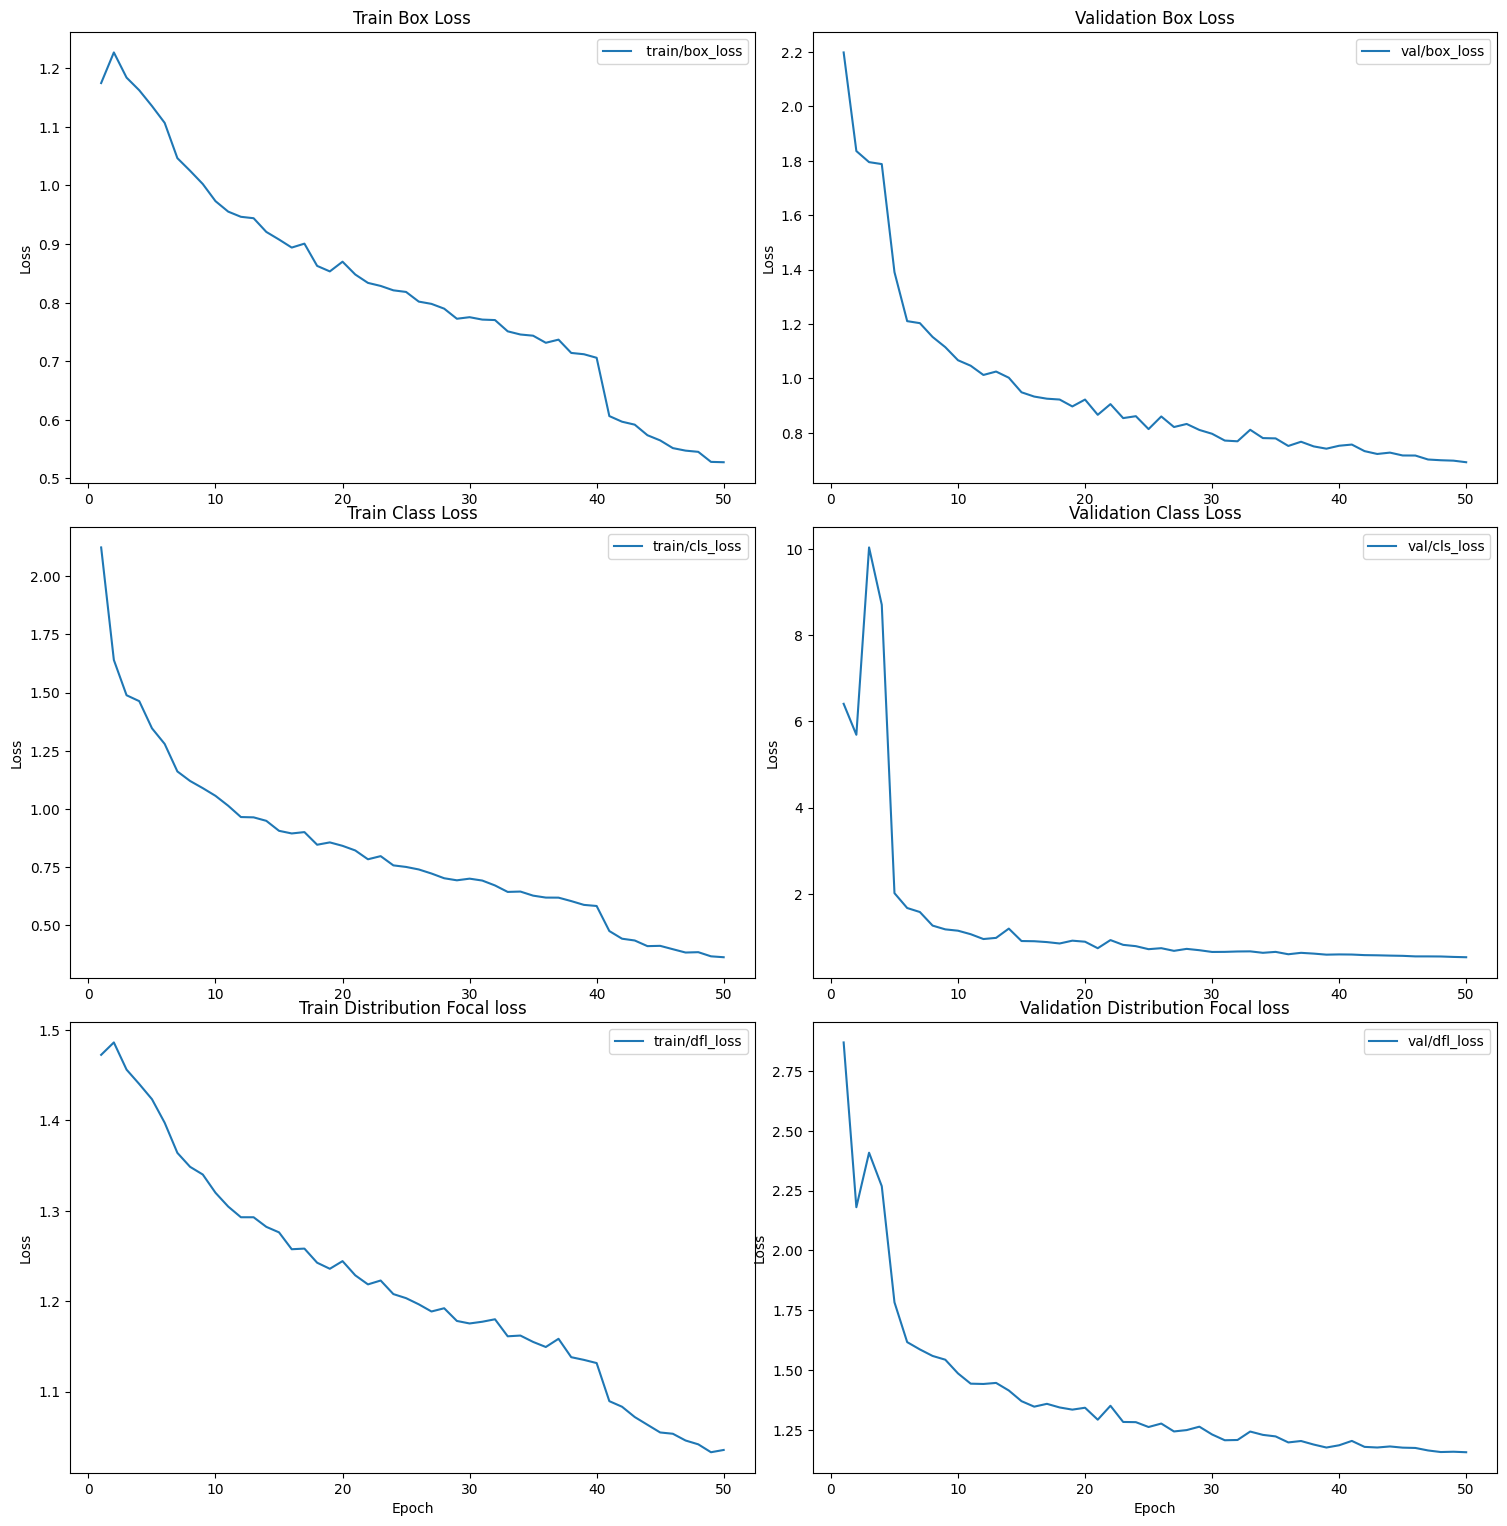

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.tight_layout()

# train/box_loss
axes[0, 0].plot(df['epoch'], df['train/box_loss'], label=' train/box_loss')
axes[0, 0].set_title('Train Box Loss')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# val/box_loss
axes[0, 1].plot(df['epoch'], df['val/box_loss'], label='val/box_loss')
axes[0, 1].set_title('Validation Box Loss')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

# train/cls_loss
axes[1, 0].plot(df['epoch'], df['train/cls_loss'], label='train/cls_loss')
axes[1, 0].set_title('Train Class Loss')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

# val/cls_loss
axes[1, 1].plot(df['epoch'], df['val/cls_loss'], label='val/cls_loss')
axes[1, 1].set_title('Validation Class Loss')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()

# train/dfl_loss
axes[2, 0].plot(df['epoch'], df['train/dfl_loss'], label='train/dfl_loss')
axes[2, 0].set_title('Train Distribution Focal loss')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Loss')
axes[2, 0].legend()

# val/dfl_loss
axes[2, 1].plot(df['epoch'], df['val/dfl_loss'], label='val/dfl_loss')
axes[2, 1].set_title('Validation Distribution Focal loss')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Loss')
axes[2, 1].legend()

plt.show()

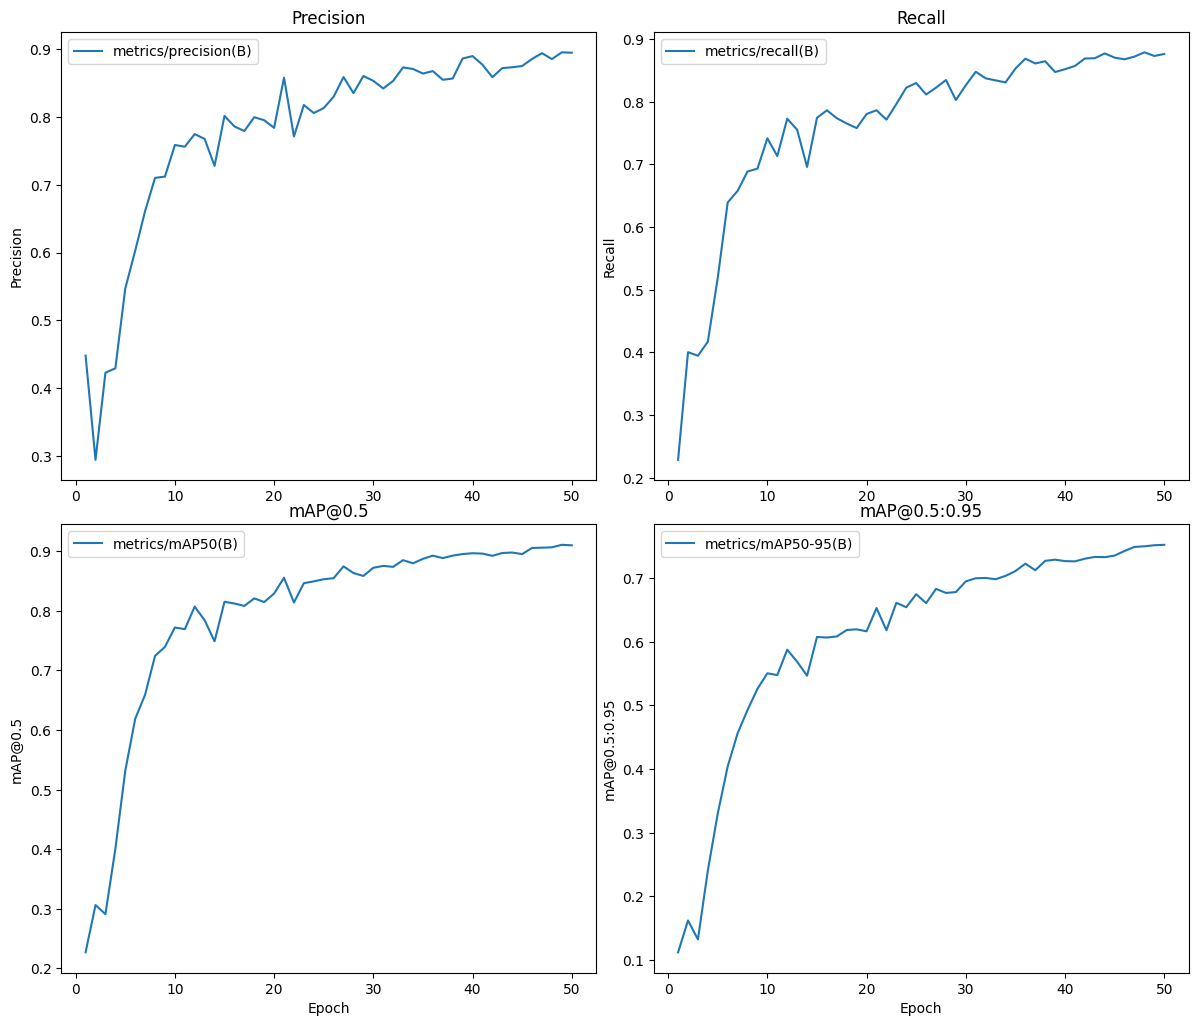

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()

# metrics/precision(B)
axes[0, 0].plot(df['epoch'], df['metrics/precision(B)'], label='metrics/precision(B)')
axes[0, 0].set_title('Precision')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].legend()

# metrics/recall(B)
axes[0, 1].plot(df['epoch'], df['metrics/recall(B)'], label='metrics/recall(B)')
axes[0, 1].set_title('Recall')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].legend()

# График для metrics/mAP50(B)
axes[1, 0].plot(df['epoch'], df['metrics/mAP50(B)'], label='metrics/mAP50(B)')
axes[1, 0].set_title('mAP@0.5')
axes[1, 0].set_ylabel('mAP@0.5')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].legend()

# metrics/mAP50-95(B)
axes[1, 1].plot(df['epoch'], df['metrics/mAP50-95(B)'], label='metrics/mAP50-95(B)')
axes[1, 1].set_title('mAP@0.5:0.95')
axes[1, 1].set_ylabel('mAP@0.5:0.95')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].legend()

plt.show()

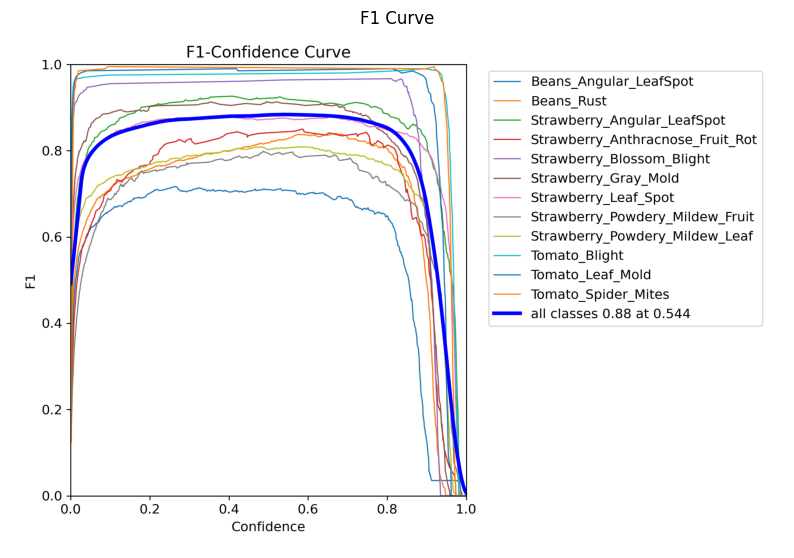

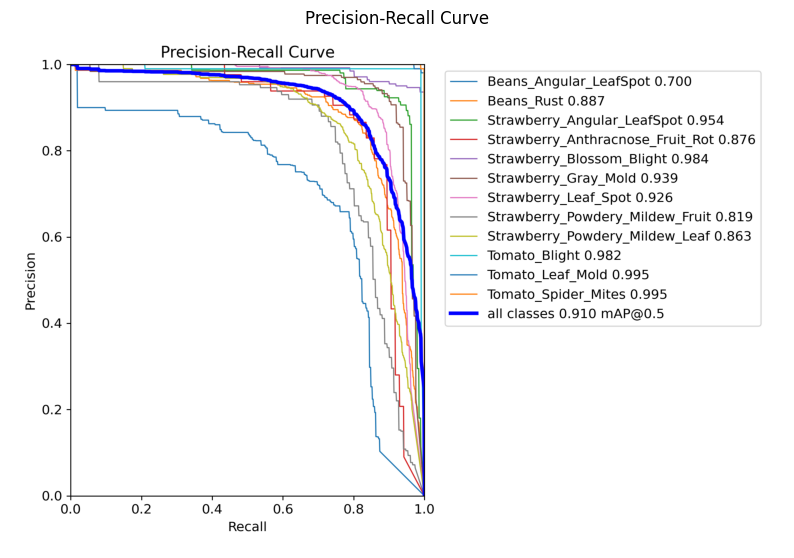

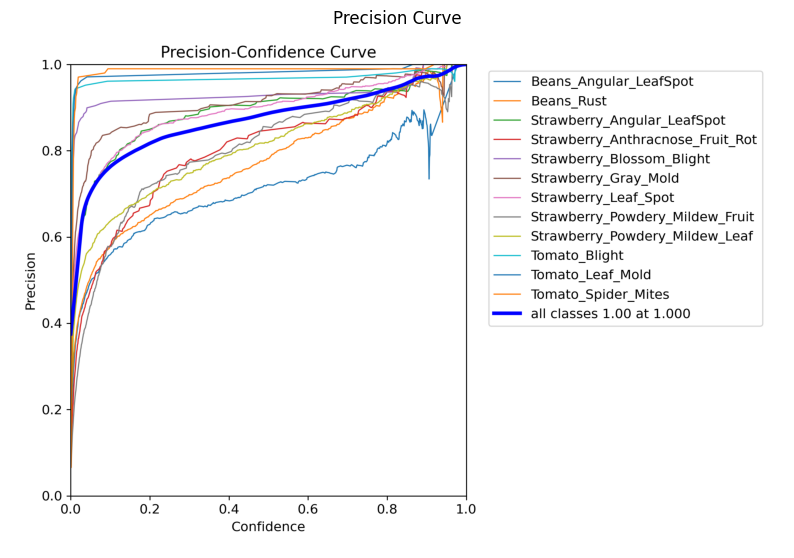

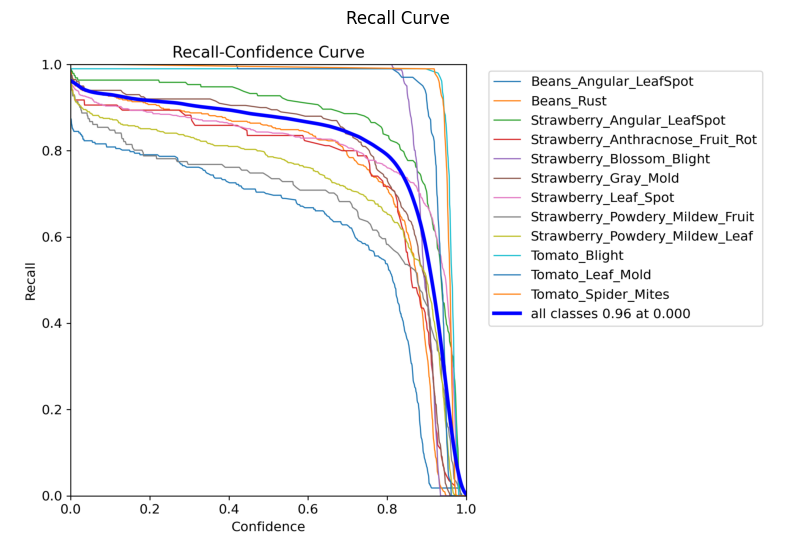

In [9]:
# F1_curve.png
f1_curve = Image.open("YOLO11l/Large_try/F1_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(f1_curve)
plt.title("F1 Curve")
plt.axis("off")
plt.show()

# PR_curve.png
pr_curve = Image.open("YOLO11l/Large_try/PR_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(pr_curve)
plt.title("Precision-Recall Curve")
plt.axis("off")
plt.show()

# P_curve.png
p_curve = Image.open("YOLO11l/Large_try/P_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(p_curve)
plt.title("Precision Curve")
plt.axis("off")
plt.show()

# R_curve.png
r_curve = Image.open("YOLO11l/Large_try/R_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(r_curve)
plt.title("Recall Curve")
plt.axis("off")
plt.show()

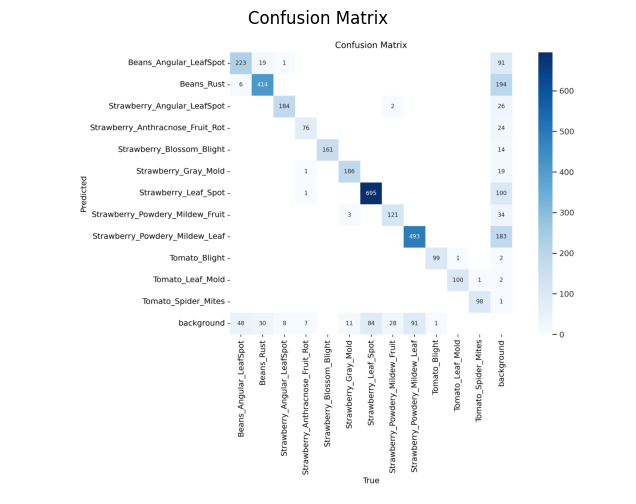

In [10]:
confusion_matrix = Image.open("YOLO11l/Large_try/confusion_matrix.png")
plt.figure(figsize=(12, 6))
plt.imshow(confusion_matrix)
plt.title("Confusion Matrix")
plt.axis("off")
plt.show()


image 1/1 /home/user/Disease/test/images/1619349070358_jpg.rf.598983cd4477c6faf4dbb5dcd65f989a.jpg: 416x416 4 Beans_Angular_LeafSpots, 21.6ms
Speed: 0.7ms preprocess, 21.6ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 416)


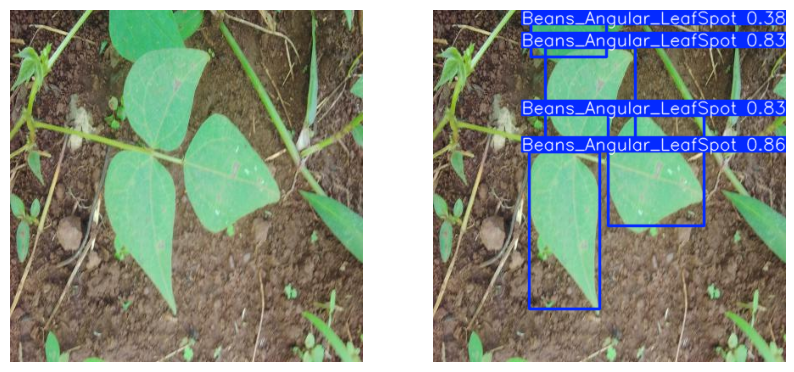

In [11]:
res = model('test/images/1619349070358_jpg.rf.598983cd4477c6faf4dbb5dcd65f989a.jpg')
detect_img = res[0].plot()
detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Отображение первого изображения
axes[0].imshow(plt.imread('test/images/1619349070358_jpg.rf.598983cd4477c6faf4dbb5dcd65f989a.jpg'))
axes[0].axis('off')

# Отображение результатов модели
axes[1].imshow(detect_img)
axes[1].axis('off')

plt.show();